<a href="https://colab.research.google.com/github/SaeedBourbour/ClassificationProjects/blob/main/HousePriceRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import Libraries***

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR

***Read Data***

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
len(data)

21613

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

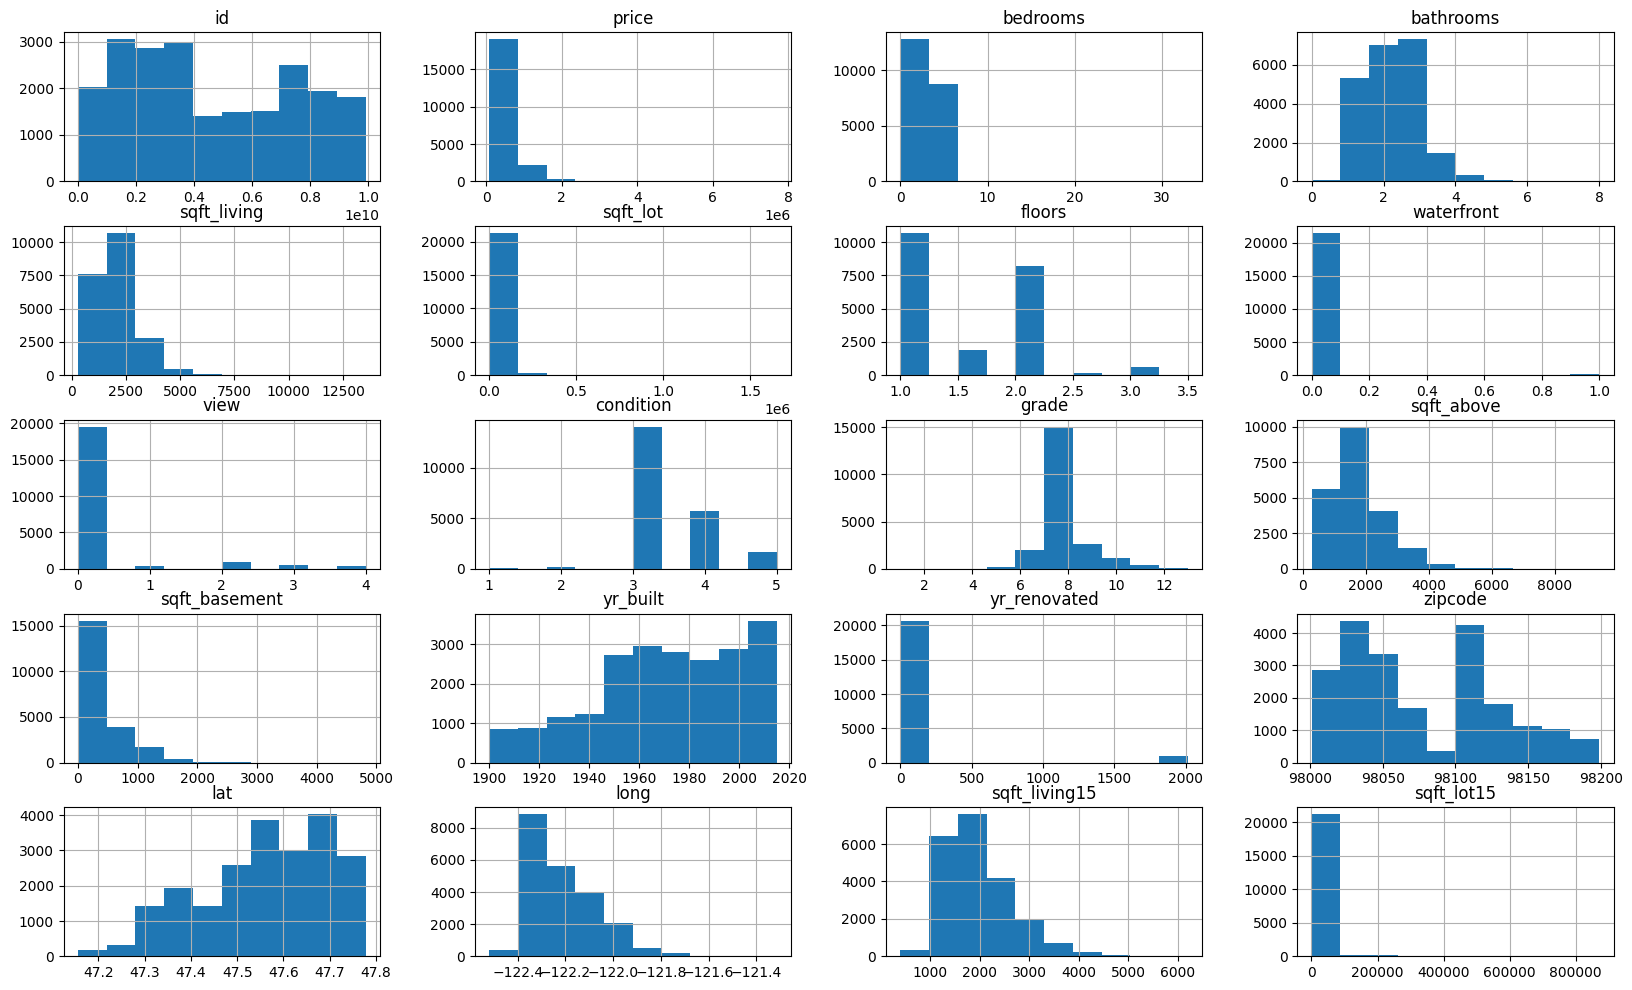

In [5]:
data.hist(figsize=(20, 12))

In [6]:
X = data.iloc[:, 3:].values
y = data['price'].values

In [7]:
np.shape(y)

(21613,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000, verbosity=3)

In [10]:
xg_reg.fit(X_train, y_train)

[20:23:35] ======== Monitor (0): HostSketchContainer ========
[20:23:35] AllReduce: 0.005007s, 1 calls @ 5007us

[20:23:35] MakeCuts: 0.005095s, 1 calls @ 5095us

[20:23:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
[20:23:40] ======== Monitor (0): Learner ========
[20:23:40] Configure: 0.001688s, 1 calls @ 1688us

[20:23:40] EvalOneIter: 0.011655s, 1000 calls @ 11655us

[20:23:40] GetGradient: 0.093244s, 1000 calls @ 93244us

[20:23:40] PredictRaw: 0.001462s, 1000 calls @ 1462us

[20:23:40] UpdateOneIter: 4.7249s, 1000 calls @ 4724903us

[20:23:40] ======== Monitor (0): GBTree ========
[20:23:40] BoostNewTrees: 4.62133s, 1000 calls @ 4621333us

[20:23:40] CommitModel: 0.000752s, 1000 calls @ 752us

[20:23:40] ======== Monitor (0): HistUpdater ========
[20:23:40] BuildHistogram: 0.814116s, 5000 calls @ 814116us

[20:23:40] EvaluateSplits: 2.15572s, 6000 calls @ 2155718us

[20:23:40] InitData: 0.085613s, 1000 calls @ 85613us

[20:23:40] InitRoot: 0.560826s, 1000 call

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred = xg_reg.predict(X_test)

[20:23:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0


In [12]:
metrics.mean_absolute_error(y_test, y_pred)

64346.26259194578

In [13]:
metrics.r2_score(y_test, y_pred)

0.8947938486800687

In [14]:
data['price'].mean()

540088.1417665294

In [15]:
data['price'].std()

367127.19648269983

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

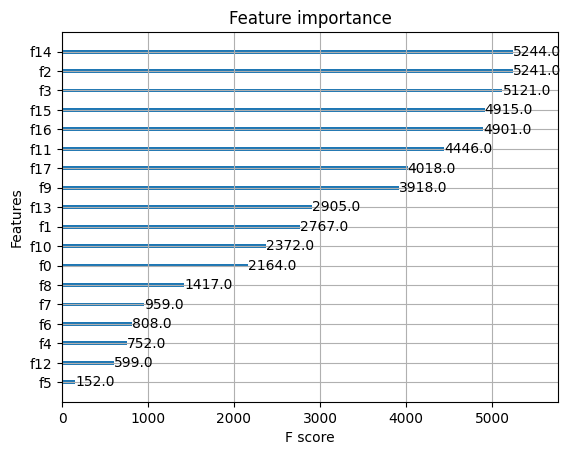

In [16]:
xgb.plot_importance(xg_reg)

In [17]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
s = SVR()
s.fit(X_train, y_train)
y_pred = s.predict(X_test)

In [19]:
metrics.mean_absolute_error(y_test, y_pred)

217277.05345507775

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Save the notebook to Google Drive
!cp /content/drive/MyDrive/HousePticeRegression.ipynb /content/

cp: cannot stat '/content/drive/MyDrive/HousePticeRegression.ipynb': No such file or directory


In [24]:
!git clone https://github.com/SaeedBourbour/Predicting-House-Prices-with-XGBoost-and-Support-Vector-Regression.git

Cloning into 'Predicting-House-Prices-with-XGBoost-and-Support-Vector-Regression'...


In [27]:
!cp /content/HousePticeRegression.ipynb /content/Predicting-House-Prices-with-XGBoost-and-Support-Vector-Regression.git/

cp: cannot stat '/content/HousePticeRegression.ipynb': No such file or directory
